# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

Ans: 朴素贝叶斯的独立假设是假设样本中每个特征都是独立的。这样的话就能使：
$ P(a_1,  a_2,...,a_n | v_j) = \prod_{i \in [1, n]} {P(a_i | v_j)} $
那么 朴素贝叶斯分类器： $ v_{NB} = argmax_{v_j\in V} P(v_j) \prod_{i \in [1, n]} {P(a_i | v_j)} $

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

Ans:
 
MAP : 最大化后验概率
 
ML: 最大化期望

设 D 是数据集， H 是预测值,  $ h \in H $

$ MAP_{h \in H} = argmax P(h | D) = argmax P(D | h) P(h) $

ML 假设 P(h) 是常数，所以得到的公式：

$ ML_{h \in H} = argmax P(h | D) = argmax P(D | h)$


#### 3. What is support vector in SVM?

Ans: 支持向量就是在起到关键作用的边界上的向量，也就是影响了分界线位置的向量。

#### 4. What is the intuition behind SVM ?

Ans : SVM是一种二分类分类器，用数学的方式将数据点处理（维度映射）后，使数据变得线性可分，并且找到最优的分割线（面）的方法。
这种方法本身过于理想化，对无规律的数据很难处理。

#### 5. Shortly describ what 'random' means in random forest ?

Ans: 随机森林的随机操作在样本的选取上随机，在样本的特征选取上也随机，随机后用新的数据来生成决策树。

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

Ans: 在迭代中先计算各个分割点叶子节点的权重，然后再计算所有叶子节点的损失函数的值，并找出损失函数值最小的那个值
对应的节点作为分割点。
下面链接博文中有寻找最佳分割点的详细方法：
https://www.jianshu.com/p/a62f4dce3ce8

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

大概看了一下样本，绝大多数新华社发的消息，文中都包含新华社关键字。最简单的方法是直接使用字符串匹配即可进行分类，若使用机器学习分类算法是杀鸡用了牛刀。

但考虑到学以致用，那么还是用这牛刀来杀一杀这鸡：

In [1]:
# 数据处理
import re
import jieba
from collections import Counter
import pandas as pd

In [2]:
def getCsvArticles(filename, contentColName, encoding='gb18030'):
    content = pd.read_csv(filename, encoding=encoding)
    articles = content[contentColName].tolist()
    return articles

content = pd.read_csv('Data/新华社数据.csv', encoding='gb18030')
content
articles = content['content'].tolist()
targets = content['source'].tolist()

# 过滤数据
# articles1

In [3]:
targets = [ '新华' in str(target)  for target in targets]

In [4]:
import pandas as pd
import numpy as np

In [5]:
# 词向量 之前项目训练好的词向量拿过来用一下
import SIF
import re

In [ ]:
class ArticleVectorCreator:
    def __init__(self, word2VecModelFilePath = 'Data/word2vect_50_w5.model', isUseThulac=True):
        self.sif = SIF.SIF(word2VecModelFilePath, isUseThulac=isUseThulac)
		
    def _splitText(self, text:str, splitChar = '(。|！|\!|？|\?|\n|\t)'):
        contents = re.split(splitChar, text)
        # print('句子切分分隔符：', splitChar)
        contents = ["".join([a, b]) if b != '\n' and b != '\t' else a + "。"
                    for a, b in zip(contents[0::2], contents[1::2])]
        contents = [content for content in contents if content.strip() != '' and content[0] != '。']
        # for i, sen in enumerate(contents):
        #     print(i, sen)
        return contents


    def article2vectors(self, content: str, splitChar='(。|！|\!|？|\?|\n|\t)', proportion=0.3):
        if not isinstance(content, str): 
            return np.zeros(self.sif.model.vector_size).tolist()
            
        contents = self._splitText(content, splitChar=splitChar)
        
        if len(contents) == 0: 
            return np.zeros(self.sif.model.vector_size).tolist()

        sentencesVec = np.array(self.sif.getSentencesEmbedding(contents))

        return sentencesVec.mean(axis=0)
    

In [15]:
vecCreator = ArticleVectorCreator()

sentenceVactors = [vecCreator.article2vectors(article) for article in articles]


Model loaded succeed


c:\programdata\anaconda3\envs\pytorch\lib\site-packages\sklearn\decomposition\_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
c:\programdata\anaconda3\envs\pytorch\lib\site-packages\sklearn\decomposition\_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
c:\programdata\anaconda3\envs\pytorch\lib\site-packages\sklearn\decomposition\_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
c:\programdata\anaconda3\envs\pytorch\lib\site-packages\sklearn\decomposition\_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
c:\programdata\anaconda3\envs\pytorch\lib\site-packages\sklearn\decomposition\_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_d

In [16]:

df = pd.DataFrame(sentenceVactors, columns=['v' + str(i) for i in range(vecCreator.sif.model.vector_size)])
df

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49
0,0.059695,-0.009337,-0.022946,0.035018,-0.004373,0.008982,0.027263,0.013755,-0.028145,-0.029990,...,0.029915,0.053271,0.038912,-0.022993,-0.005938,0.059960,-0.001518,-0.002711,-0.002761,-0.070813
1,0.036578,-0.026215,-0.000316,-0.008796,-0.001501,-0.013679,-0.004473,0.023212,-0.039208,-0.016242,...,-0.001200,0.043408,0.023386,-0.035161,-0.038188,0.027764,-0.030579,-0.009569,0.011136,-0.061793
2,0.013316,0.000115,0.005028,-0.027200,0.001585,-0.030447,0.063768,0.044250,-0.004524,0.036390,...,0.010934,0.026795,0.049374,0.003089,-0.042682,0.024560,-0.030715,0.010257,0.009496,-0.057000
3,-0.363249,-0.122822,0.325413,0.123779,0.171772,0.144975,0.197725,-0.176643,0.004961,0.201400,...,0.072165,-0.047823,0.153613,0.092848,-0.397207,-0.206684,0.276755,0.161583,-0.448328,-0.506261
4,0.083683,0.009062,0.229320,0.038519,0.131337,0.010707,0.048228,0.039380,0.082187,0.009607,...,-0.082951,0.049965,-0.102431,-0.032977,-0.147751,0.078322,0.071299,0.208911,-0.035930,-0.147888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89606,0.004802,-0.003278,0.005942,0.002594,-0.002198,-0.002753,-0.001397,0.001476,0.002347,0.000012,...,0.001307,0.000005,0.001776,0.005035,-0.002873,0.003893,0.008041,0.001480,-0.008886,0.004115
89607,-0.019761,0.005361,-0.004319,0.037916,-0.038075,-0.046396,-0.004838,-0.000525,-0.019799,-0.057459,...,-0.021184,0.034951,0.022251,-0.007963,0.002757,0.010815,-0.021651,0.002936,0.003012,-0.021008
89608,-0.024859,-0.004873,0.043734,-0.002086,0.007441,0.032423,-0.026173,0.059899,-0.020845,0.001088,...,-0.002026,-0.001441,-0.007306,-0.016804,-0.027132,-0.009693,0.018243,0.016737,-0.019556,-0.007503
89609,-0.004507,-0.016800,-0.045807,0.049439,-0.018654,0.045599,-0.019555,0.023055,-0.047137,-0.037106,...,0.027673,0.014913,-0.054341,-0.044435,-0.040179,-0.012696,0.020320,-0.035151,0.032350,0.032860


In [27]:
df.to_csv('Data/articlesVec_50d.csv')

In [6]:
df = pd.read_csv(r'Data/articlesVec_50d.csv', sep=',', header=0, index_col=0)
df

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49
0,0.059695,-0.009337,-0.022946,0.035018,-0.004373,0.008982,0.027263,0.013755,-0.028145,-0.029990,...,0.029915,0.053271,0.038912,-0.022993,-0.005938,0.059960,-0.001518,-0.002711,-0.002761,-0.070813
1,0.036578,-0.026215,-0.000316,-0.008796,-0.001501,-0.013679,-0.004473,0.023212,-0.039208,-0.016242,...,-0.001200,0.043408,0.023386,-0.035161,-0.038188,0.027764,-0.030579,-0.009569,0.011136,-0.061793
2,0.013316,0.000115,0.005028,-0.027200,0.001585,-0.030447,0.063768,0.044250,-0.004524,0.036390,...,0.010934,0.026795,0.049374,0.003089,-0.042682,0.024560,-0.030715,0.010257,0.009496,-0.057000
3,-0.363249,-0.122822,0.325413,0.123779,0.171772,0.144975,0.197725,-0.176643,0.004961,0.201400,...,0.072165,-0.047823,0.153613,0.092848,-0.397207,-0.206684,0.276755,0.161583,-0.448328,-0.506261
4,0.083683,0.009062,0.229320,0.038519,0.131337,0.010707,0.048228,0.039380,0.082187,0.009607,...,-0.082951,0.049965,-0.102431,-0.032977,-0.147751,0.078322,0.071299,0.208911,-0.035930,-0.147888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89606,0.004802,-0.003278,0.005942,0.002594,-0.002198,-0.002753,-0.001397,0.001476,0.002347,0.000012,...,0.001307,0.000005,0.001776,0.005035,-0.002873,0.003893,0.008041,0.001480,-0.008886,0.004115
89607,-0.019761,0.005361,-0.004319,0.037916,-0.038075,-0.046396,-0.004838,-0.000525,-0.019799,-0.057459,...,-0.021184,0.034951,0.022251,-0.007963,0.002757,0.010815,-0.021651,0.002936,0.003012,-0.021008
89608,-0.024859,-0.004873,0.043734,-0.002086,0.007441,0.032423,-0.026173,0.059899,-0.020845,0.001088,...,-0.002026,-0.001441,-0.007306,-0.016804,-0.027132,-0.009693,0.018243,0.016737,-0.019556,-0.007503
89609,-0.004507,-0.016800,-0.045807,0.049439,-0.018654,0.045599,-0.019555,0.023055,-0.047137,-0.037106,...,0.027673,0.014913,-0.054341,-0.044435,-0.040179,-0.012696,0.020320,-0.035151,0.032350,0.032860


###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df, targets, test_size = 0.1, random_state=0)
len(X_train)

80649

In [10]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
Y_predict = randomForest.predict(X_test)


In [12]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [13]:
# 混淆矩阵
confusion_matrix = confusion_matrix(Y_test, Y_predict)

In [14]:
confusion_matrix

array([[ 645,  425],
       [  35, 7857]], dtype=int64)

In [15]:
# ROC
total = sum(sum(confusion_matrix))
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
specificity = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
print("total:", total, "Sensitivity:", sensitivity, "Specificity:", specificity)

total: 8962 Sensitivity: 0.9485294117647058 Specificity: 0.9486838927795218


In [16]:
Y_pred_quant = randomForest.predict_proba(X_test)[:, 1]
Y_pred_quant

array([0.82      , 1.        , 0.02      , ..., 0.80657611, 1.        ,
       0.99      ])

In [17]:
Y_predict

array([ True,  True, False, ...,  True,  True,  True])

In [9]:
import matplotlib.pyplot as plt

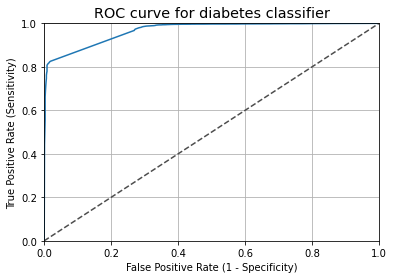

In [19]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_quant)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [20]:
auc(fpr, tpr)

0.9665371534406072

#### 使用冠军分类器Xgboost试试

In [9]:
from xgboost import XGBClassifier

In [10]:
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [11]:
Y_predict = xgboost.predict(X_test)


In [12]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [13]:
# 混淆矩阵
confusion_matrix = confusion_matrix(Y_test, Y_predict)

In [14]:
confusion_matrix

array([[ 984,   86],
       [ 307, 7585]], dtype=int64)

In [15]:
# ROC
total = sum(sum(confusion_matrix))
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
specificity = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
print("total:", total, "Sensitivity:", sensitivity, "Specificity:", specificity)

total: 8962 Sensitivity: 0.7621998450813323 Specificity: 0.988788945378699


In [16]:
Y_pred_quant = xgboost.predict_proba(X_test)[:, 1]
Y_pred_quant

array([9.9867117e-01, 9.9982941e-01, 3.4835242e-04, ..., 9.7625738e-01,
       9.9999869e-01, 9.9994981e-01], dtype=float32)

In [17]:
Y_predict

array([ True,  True, False, ...,  True,  True,  True])

In [18]:
import matplotlib.pyplot as plt

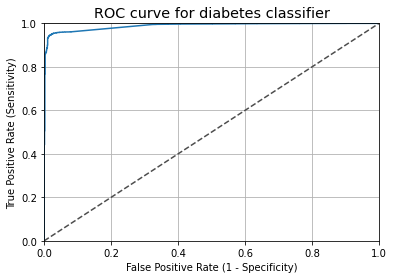

In [19]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_quant)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [20]:
auc(fpr, tpr)

0.9883401978106304

#### 冠军不愧是冠军! Xgboost 棒棒哒！

#### 下面尝试一下据说也能牛X的支持向量机算法

In [10]:
from sklearn.svm import SVC

In [11]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
Y_predict = svm.predict(X_test)


In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [14]:
# 混淆矩阵
confusion_matrix = confusion_matrix(Y_test, Y_predict)

In [15]:
confusion_matrix

array([[ 740,  330],
       [  34, 7858]], dtype=int64)

In [16]:
# ROC
total = sum(sum(confusion_matrix))
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
specificity = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
print("total:", total, "Sensitivity:", sensitivity, "Specificity:", specificity)

total: 8962 Sensitivity: 0.9560723514211886 Specificity: 0.9596971177332682


In [19]:
# Y_pred_quant = svm.predict_proba(X_test)[:, 1]
# Y_pred_quant

In [20]:
# Y_predict

In [ ]:
import matplotlib.pyplot as plt

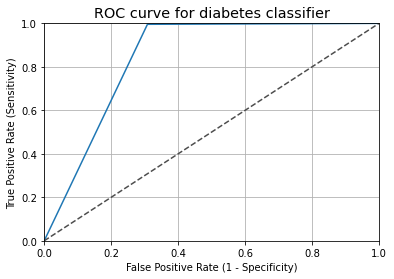

In [18]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:
auc(fpr, tpr)

0.8436403124422697

#### 支持向量机结果很勉强！相比上面两种分类算法就很糟糕了。

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).